In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Hypertension_data.csv')

In [3]:
df.head()

,education,age,BMI,currentSmoker,prevalentHyp,heartRate
0,4,33,21.61,1,0,75
1,2,34,23.88,2,0,73
2,1,34,21.50,1,0,75
3,3,34,20.81,2,0,78
4,3,34,29.04,1,0,63


In [4]:
df.tail()

,education,age,BMI,currentSmoker,prevalentHyp,heartRate
1002,1,67,22.69,1,1,75
1003,1,67,20.50,2,1,88
1004,1,68,24.68,1,0,72
1005,1,68,26.37,1,0,96
1006,4,68,30.28,2,1,70


In [5]:
df.isnull().sum()

education        0
age              0
BMI              0
currentSmoker    0
prevalentHyp     0
heartRate        0
dtype: int64

In [6]:
df['prevalentHyp'].value_counts()

prevalentHyp
0    699
1    308
Name: count, dtype: int64

In [7]:
x=df.drop(['prevalentHyp'],axis=1)
y=df['prevalentHyp']

In [8]:
x

,education,age,BMI,currentSmoker,heartRate
0,4,33,21.61,1,75
1,2,34,23.88,2,73
2,1,34,21.50,1,75
3,3,34,20.81,2,78
4,3,34,29.04,1,63
...,...,...,...,...,...
1002,1,67,22.69,1,75
1003,1,67,20.50,2,88
1004,1,68,24.68,1,72
1005,1,68,26.37,1,96


In [9]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
smote=SMOTE()

In [12]:
x,y=smote.fit_resample(x,y)

In [13]:
y.value_counts()

prevalentHyp
0    699
1    699
Name: count, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,)

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((978, 5), (978,), (420, 5), (420,))

<Axes: >

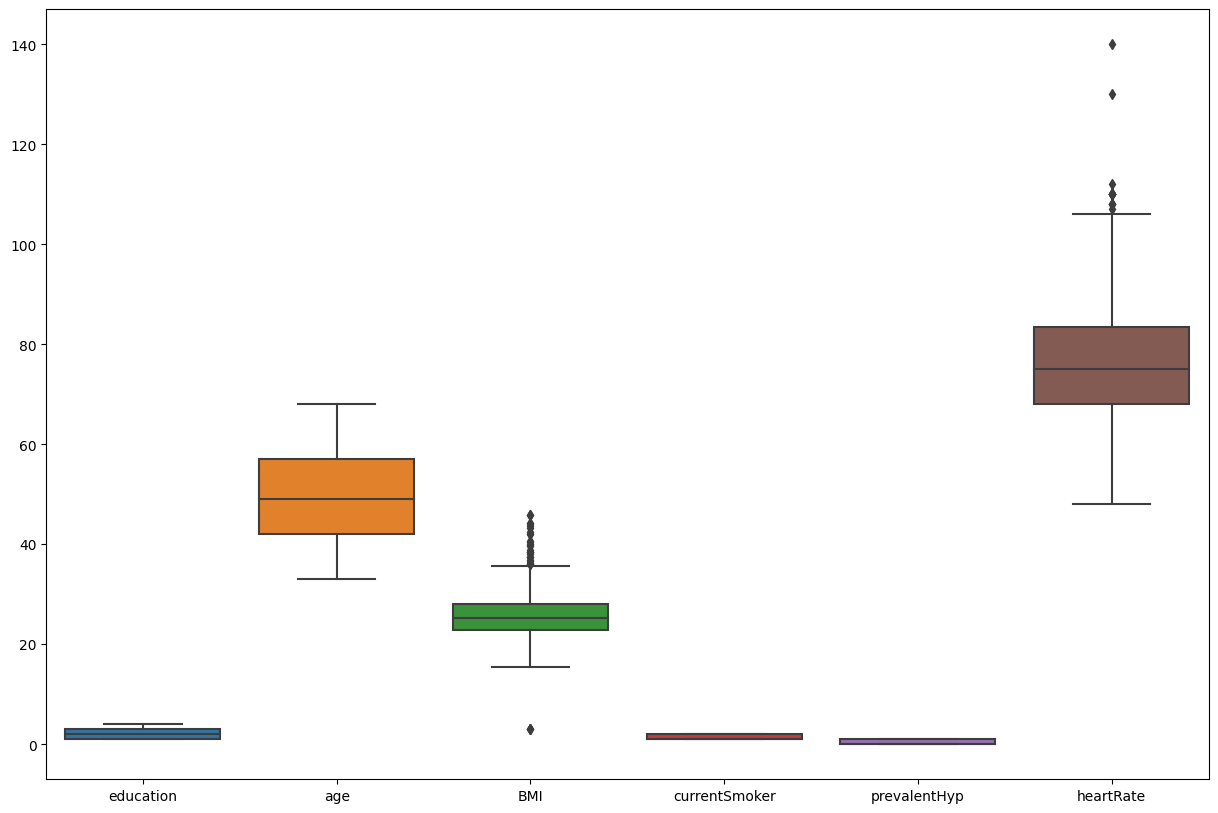

In [17]:
plt.figure(figsize=(15,10))
sns.boxplot(df)

In [18]:
## outliers , so we have to normalize them

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()

In [21]:
x_train_scaled=scaler.fit_transform(x_train)

In [22]:
x_test_scaled=scaler.transform(x_test)

In [23]:
## lets train our model

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
nbc=GaussianNB()

In [26]:
nbc.fit(x_train_scaled,y_train)

GaussianNB()

In [27]:
y_pred=nbc.predict(x_test_scaled)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(accuracy_score(y_test,y_pred))

0.6666666666666666


In [30]:
## lets use Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [32]:
rfc=RandomForestClassifier()

In [33]:
parameter={'max_depth':[3,5,10,None],
          'n_estimators':[100,200,300],
          'criterion':['gini','entropy']}

In [34]:
from sklearn.model_selection import RandomizedSearchCV

In [35]:
rsc=RandomizedSearchCV(rfc,param_distributions=parameter,cv=5,verbose=3,scoring='accuracy')

In [36]:
rsc.fit(x_train_scaled,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.724 total time=   0.4s
[CV 2/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.765 total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.689 total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.672 total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=3, n_estimators=200;, score=0.682 total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.730 total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.770 total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.694 total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.697 total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=5, n_estimators=300;, score=0.708 total time=   0.6s
[CV 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'n_estimators': [100, 200, 300]},
                   scoring='accuracy', verbose=3)

In [37]:
rsc.best_params_

{'n_estimators': 100, 'max_depth': 10, 'criterion': 'gini'}

In [38]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=None,criterion='gini')

In [39]:
rfc.fit(x_train_scaled,y_train)

RandomForestClassifier(n_estimators=300)

In [40]:
y_pred=rfc.predict(x_test_scaled)

In [41]:
accuracy_score(y_test,y_pred)

0.7642857142857142

In [42]:
from sklearn.svm import SVC

In [43]:
svc=SVC()

In [44]:
svc.fit(x_train_scaled,y_train)

SVC()

In [45]:
y_pred=svc.predict(x_test_scaled)

In [46]:
accuracy_score(y_test,y_pred)

0.7119047619047619

In [47]:
## We will randomforest classifier

In [48]:
import pickle

In [50]:
pickle.dump(rfc,open('/config/workspace/pickle/rfc_hypertension.pkl','wb'))

In [51]:
pickle.dump(scaler,open('/config/workspace/pickle/scaler_hypertension.pkl','wb'))

In [57]:
pkl1=pickle.load(open('pickle_files/scaler_hypertension.pkl','rb'))

In [67]:
sc=pkl1.transform([[1,67,22.69,1,75]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [59]:
pkl2=pickle.load(open('pickle_files/rfc_hypertension.pkl','rb'))

In [68]:
pkl2.predict(sc)

array([1])